In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import cv2

In [66]:
img = np.array(Image.open("../leaves/images/Grape_spot/image (1024).JPG", "r"))

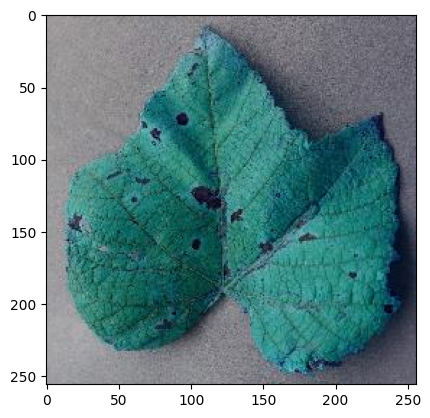

In [67]:
pcv.plot_image(img)

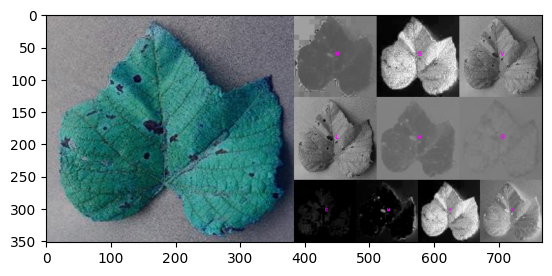

In [68]:
colospace = pcv.visualize.colorspaces(rgb_img=img)
pcv.plot_image(colospace)

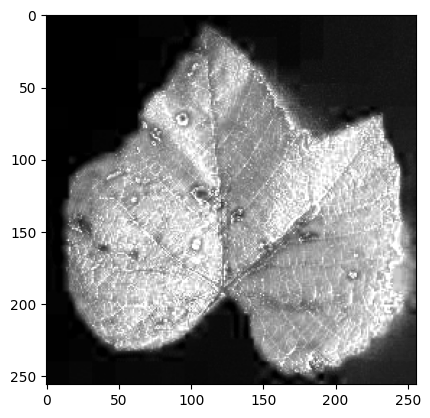

In [69]:
# grey_img = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
gray_img = pcv.rgb2gray_cmyk(rgb_img=img, channel='y')
pcv.plot_image(gray_img)

In [70]:
hist = pcv.visualize.histogram(img = gray_img)
hist

alt.Chart(...)

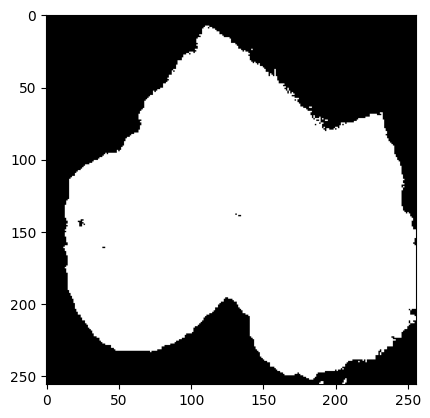

In [71]:
thresh = pcv.threshold.binary(gray_img=gray_img, threshold=55, object_type="light")
pcv.plot_image(thresh)

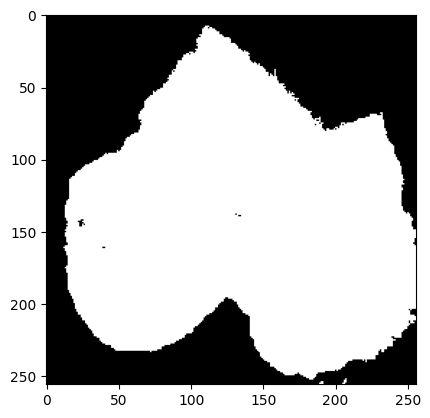

In [72]:
a_fill_image = pcv.fill(bin_img=thresh, size=3)
pcv.plot_image(a_fill_image)

In [2]:
roi = pcv.roi.rectangle(img=img, x=0, y=0, h=256, w=256)
roi


NameError: name 'img' is not defined

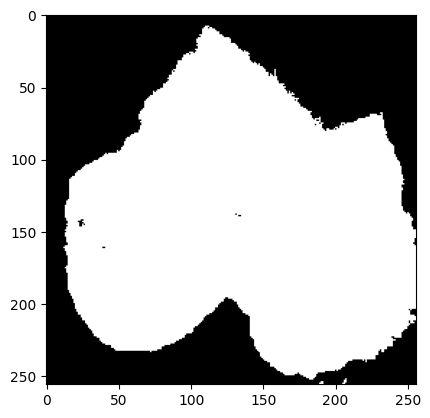

In [117]:
mask = pcv.roi.filter(mask=a_fill_image, roi=roi, roi_type="partial")

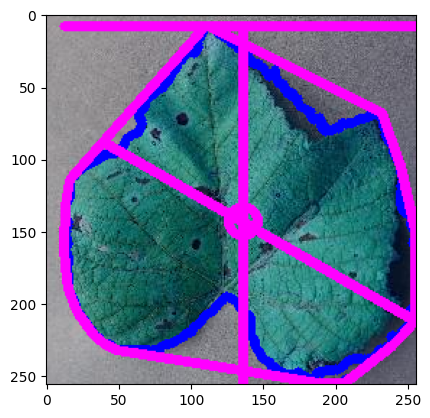

In [98]:
shape_img = pcv.analyze.size(img=img,labeled_mask=mask, n_labels=1)
pcv.plot_image(shape_img)

In [114]:
pcv.outputs.observations.keys()
# # Accéder aux résultats spécifiques
print(pcv.outputs.observations['default_1'].keys())
pcv.outputs.observations['default_1']["object_in_frame"]
# perimeter = pcv.outputs.observations['segment_perimeter']['value']

dict_keys(['in_bounds', 'area', 'convex_hull_area', 'solidity', 'perimeter', 'width', 'height', 'longest_path', 'center_of_mass', 'convex_hull_vertices', 'object_in_frame', 'ellipse_center', 'ellipse_major_axis', 'ellipse_minor_axis', 'ellipse_angle', 'ellipse_eccentricity'])


{'trait': 'object in frame',
 'method': 'plantcv.plantcv.analyze.size',
 'scale': 'none',
 'datatype': "<class 'bool'>",
 'value': False,
 'label': 'none'}

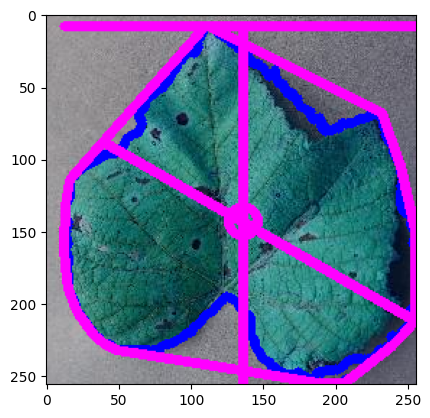

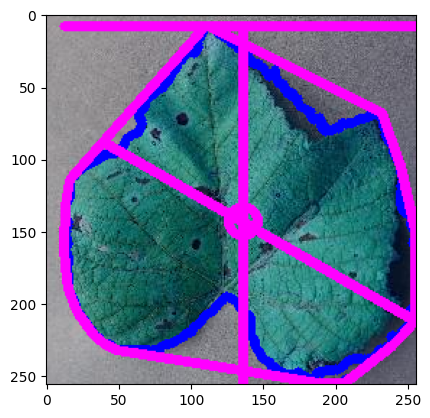

In [106]:
pcv.params.debug = "plot"
# Optionally, set a sample label name
pcv.params.sample_label = "plant"

# Characterize object shapes
shape_image = pcv.analyze.size(img=img, labeled_mask=mask, n_labels=1)

# Save returned images with more specific naming
pcv.plot_image(shape_img)

# Access data stored out from analyze.size
plant_solidity = pcv.outputs.observations['default_1']['solidity']['value']

In [107]:
plant_solidity

0.886088416340235

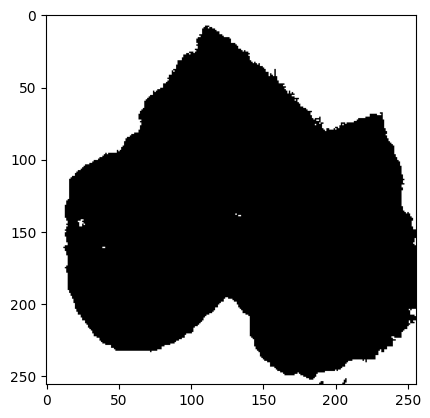

In [118]:
# pcv.fill(bin_img=mask, size=3)
mask2 = pcv.invert(gray_img=mask)

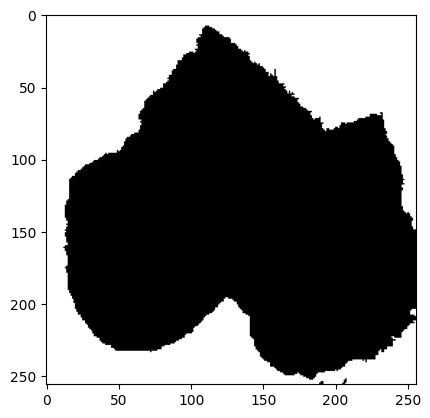

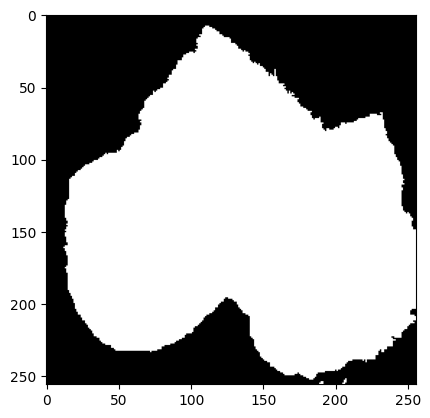

In [119]:
mask3 = pcv.invert(pcv.fill(bin_img=mask2, size=15))

In [120]:
mask3 = mask3/255

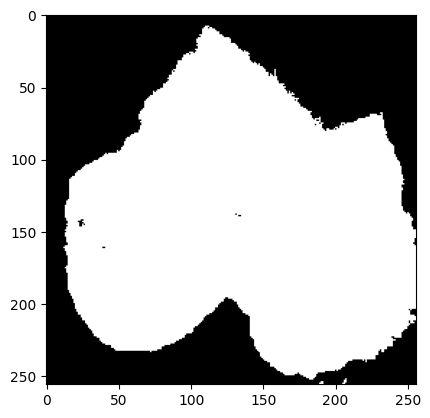

In [123]:
pcv.plot_image(mask)


In [134]:
mask = cv2.resize(mask3, (img.shape[1], img.shape[0]))


In [135]:
result = np.ones_like(img) * 255

In [138]:
result[mask == 0] = img[mask == 0]

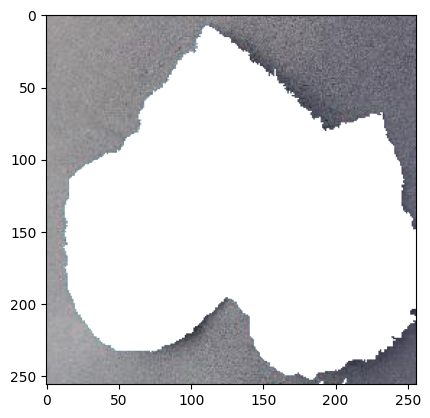

In [139]:
pcv.plot_image(result)